##*Elizabeth Torres Torrecillas* 

# *Actividad 5*



---

---

---




In [22]:
#Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
#Biblioteca nueva a utilizar, nos ayudará a calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

#Matplotlib mostrará los resultados en la Notebook de Jupyter 
%matplotlib inline

Tratamiento de datos 





In [23]:
#En esta celda se hacen todas las operaciones de preparar el DataFrame df_meteo

#Guardamos el archivo .txt que subimos a Github en la variable url
url='https://raw.githubusercontent.com/elizabethtorrest/Fisica-Computacional/F%C3%ADsica-Computacional/Actividad5/Climatologia%20Imuris%20Sonora.txt'

# Definimos los nombres de las columnas
type_data = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

#leemos el archivo .txt que subimos a github y lo convertimos a csv
df_dist=pd.read_csv(url, names=type_data, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Hacemos una copia del trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertimos los valores de las variables ambientales a números flotantes
inf_met = ['Precip', 'Evap', 'Tmax', 'Tmin']
for inf in inf_met:
  df_work1[inf] = pd.to_numeric(df_work1[inf], errors='coerce')

#Definimos un nuevo DataFrame por si hay que regresarse.
df_work2 = df_work1.copy()

#Aquí vamos a convertir del tipo objeto a el formato que el lenguaje utilizado comprende
#Esto ya que la variable tipo fecha de Python, contiene mucha información condensada
#La función pd.to_datetime convierte una cadena en tipo datetime64[ns]
# Agregamos la opción de que el primer dato es el día (dayfirst=True) 
df_work2['Fecha'] = pd.to_datetime(df_work2['Fecha'], dayfirst=True). copy()

#Formato de año
df_work2['Año'] = df_work2['Fecha'].dt.year
#Formato de mes
df_work2['Mes'] = df_work2['Fecha'].dt.month

#Definimos un nuevo DataFrame para el análisis de los datos meteorológicos
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12139 entries, 0 to 12138
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   12139 non-null  datetime64[ns]
 1   Precip  12134 non-null  float64       
 2   Evap    0 non-null      float64       
 3   Tmax    11972 non-null  float64       
 4   Tmin    11979 non-null  float64       
 5   Año     12139 non-null  int64         
 6   Mes     12139 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 664.0 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1981-01-01     0.0   NaN  27.0   5.0  1981    1
1 1981-01-02     0.0   NaN  25.0   5.0  1981    1
2 1981-01-03     0.0   NaN  26.0   6.0  1981    1
3 1981-01-04     0.0   NaN  22.5   7.0  1981    1
4 1981-01-05     0.0   NaN  22.5   6.0  1981    1
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
12134 2016-04-26     0.0   NaN  28.0   5.0  2016    4
12135 2016-04-27 

In [24]:
#ESTA ESTACIÓN SE UTILIZARÁ PARA ADJUNTAR A LOS DATOS DE EVAPORACIÓN, YA QUE LA ESTACIÓN "EL FRESNAL", no tiene registro de los mismos.
#En esta celda se hacen todas las operaciones de preparar el DataFrame df_meteo

#Guardamos el archivo .txt que subimos a Github en la variable url
url='https://raw.githubusercontent.com/elizabethtorrest/Fisica-Computacional/F%C3%ADsica-Computacional/Actividad5/Climatologia%20San%20Miguel%20de%20Horcasitas%20Sonora.txt'

# Definimos los nombres de las columnas
type_data_2 = ['Fecha','Precip','Evap','Tmax','Tmin']

#leemos el archivo .txt que subimos a github y lo convertimos a csv
df_dist_2=pd.read_csv(url, names=type_data_2, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Hacemos una copia del trabajo y preservamos el dataframe original
df_work0_2 = df_dist_2.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1_2 = df_work0_2.replace(to_replace=str_Nulo, value='', regex=True)

#Convertimos los valores de las variables ambientales a números flotantes
inf_met_2 = ['Evap']
for inf_2 in inf_met_2:
  df_work1_2[inf_2] = pd.to_numeric(df_work1_2[inf_2], errors='coerce')

#Definimos un nuevo DataFrame por si hay que regresarse.
df_work2_2 = df_work1_2.copy()

#Aquí vamos a convertir del tipo objeto a el formato que el lenguaje utilizado comprende
#Esto ya que la variable tipo fecha de Python, contiene mucha información condensada
#La función pd.to_datetime convierte una cadena en tipo datetime64[ns]
# Agregamos la opción de que el primer dato es el día (dayfirst=True) 
df_work2_2['Fecha'] = pd.to_datetime(df_work2_2['Fecha'], dayfirst=True). copy()

#Formato de año
df_work2_2['Año'] = df_work2_2['Fecha'].dt.year
#Formato de mes
df_work2_2['Mes'] = df_work2_2['Fecha'].dt.month

#Definimos un nuevo DataFrame para el análisis de los datos meteorológicos
df_meteo_2 = df_work2_2.copy()
df_meteo_2.info()
print(df_meteo_2.head())
print(df_meteo_2.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14859 entries, 0 to 14858
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   14859 non-null  datetime64[ns]
 1   Precip  14859 non-null  object        
 2   Evap    12375 non-null  float64       
 3   Tmax    14859 non-null  object        
 4   Tmin    14859 non-null  object        
 5   Año     14859 non-null  int64         
 6   Mes     14859 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 812.7+ KB
       Fecha Precip  Evap  Tmax Tmin   Año  Mes
0 1974-01-17      0   NaN  29.5  5.5  1974    1
1 1974-01-18      0   4.5  28.5  7.5  1974    1
2 1974-01-19      0   5.4  28.5  6.5  1974    1
3 1974-01-20      0   3.8    28    6  1974    1
4 1974-01-21      0   2.8  26.5  6.5  1974    1
           Fecha Precip  Evap  Tmax  Tmin   Año  Mes
14854 2015-07-27      0   6.7  34.5  22.5  2015    7
14855 2015-07-28   

###Convertimos la columna de "Mes" a una cadena de caracteres (variable categórica), esto nos ayudará a llevar un orden como es el conocido y no por número enteros del 1 a 12. 
> Esto con ayuda de la función .dt.strftime('%b'), %b representa los meses en formato abreviado y en inglés.

In [25]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
#DE LA ESTACIÓN 2
df_meteo_2.drop('Mes', axis=1, inplace=True)
df_meteo_2['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo_2.info()
print(df_meteo_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12139 entries, 0 to 12138
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   12139 non-null  datetime64[ns]
 1   Precip  12134 non-null  float64       
 2   Evap    0 non-null      float64       
 3   Tmax    11972 non-null  float64       
 4   Tmin    11979 non-null  float64       
 5   Año     12139 non-null  int64         
 6   Mes     12139 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 664.0+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1981-01-01     0.0   NaN  27.0   5.0  1981  Jan
1 1981-01-02     0.0   NaN  25.0   5.0  1981  Jan
2 1981-01-03     0.0   NaN  26.0   6.0  1981  Jan
3 1981-01-04     0.0   NaN  22.5   7.0  1981  Jan
4 1981-01-05     0.0   NaN  22.5   6.0  1981  Jan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14859 entries, 0 to 14858
Data columns (total 7 columns):
 #   

###Creamos una Serie de Tiempo, fijando a la variable 'Fecha' como nuevo índice del DataFrame. 

In [26]:
#Nueva actividad
#Hacemos una copia del último DataFrame
df_meteo_ts = df_meteo.copy()
#Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

#Verificamos que se haya realizado de la manera correcta
df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())


#DE LA ESTACIÓN 2
#Nueva actividad
#Hacemos una copia del último DataFrame
df_meteo_ts_2 = df_meteo_2.copy()
#Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts_2 = df_meteo_ts_2.set_index('Fecha')

#Verificamos que se haya realizado de la manera correcta
df_meteo_ts_2.info()
print(df_meteo_ts_2.head())
print(df_meteo_ts_2.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12139 entries, 1981-01-01 to 2016-04-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  12134 non-null  float64
 1   Evap    0 non-null      float64
 2   Tmax    11972 non-null  float64
 3   Tmin    11979 non-null  float64
 4   Año     12139 non-null  int64  
 5   Mes     12139 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 663.9+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1981-01-01     0.0   NaN  27.0   5.0  1981  Jan
1981-01-02     0.0   NaN  25.0   5.0  1981  Jan
1981-01-03     0.0   NaN  26.0   6.0  1981  Jan
1981-01-04     0.0   NaN  22.5   7.0  1981  Jan
1981-01-05     0.0   NaN  22.5   6.0  1981  Jan
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2016-04-26     0.0   NaN  28.0   5.0  2016  Apr
2016-04-27     0.0   NaN  25.0   5.

* Actividad 1                                                              
  *Exploramos los datos de Precipitación de los años 1990 hasta el fin de datos*
> Graficamos todo el rango de datos                                               
> Analizamos un año específico completo                                                
> Graficamos la estacionalidad de los datos por mes


In [27]:
#Seleccionaremos un conjunto de años de 26 años, desde 1990
df_26 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2016)]

#Seleccionaremos un conjunto de años de los últimos 25 años DE LA ESTACIÓN 2, desde 1990
df_26_2 = df_meteo_ts_2[(df_meteo_ts_2['Año'] >= 1990) & (df_meteo_ts_2['Año'] < 2015)]

Text(0.5, 1.0, 'Precipitación de los últimos 26 años de El Fresnal')

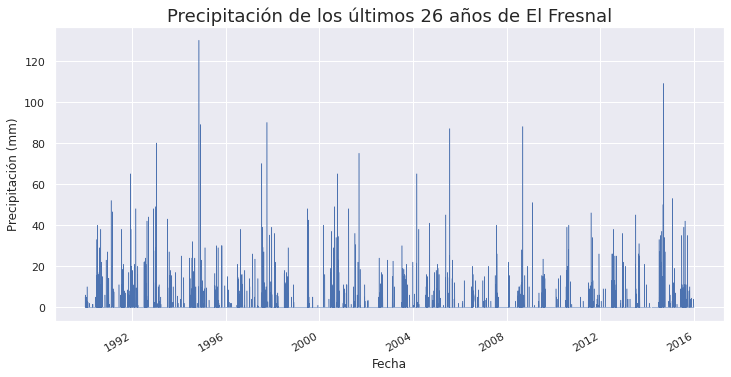

In [28]:
#Tamaño de la figura a graficar
sns.set(rc={'figure.figsize':(12, 6)})

#Grafica todo el rango de datos 
#Esto con ayuda de la función df.plot() 
df_26['Precip'].plot(linewidth=0.5);
plt.xlabel('Fecha');
plt.ylabel('Precipitación (mm)');
plt.title('Precipitación de los últimos 26 años de El Fresnal', fontsize=18)

Text(0.5, 1.0, 'Precipitación en el año 2010 de El Fresnal')

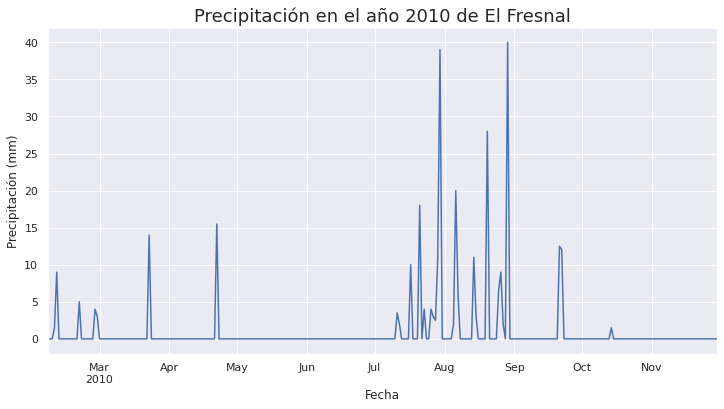

In [29]:
#Analizamos un año específico completo
#Esto con ayuda de la función df.loc() para seleccionar el rango de datos. 
ax = df_26.loc['2010', 'Precip'].plot()
ax.set_ylabel('Precipitación (mm)');
plt.title('Precipitación en el año 2010 de El Fresnal', fontsize=18)

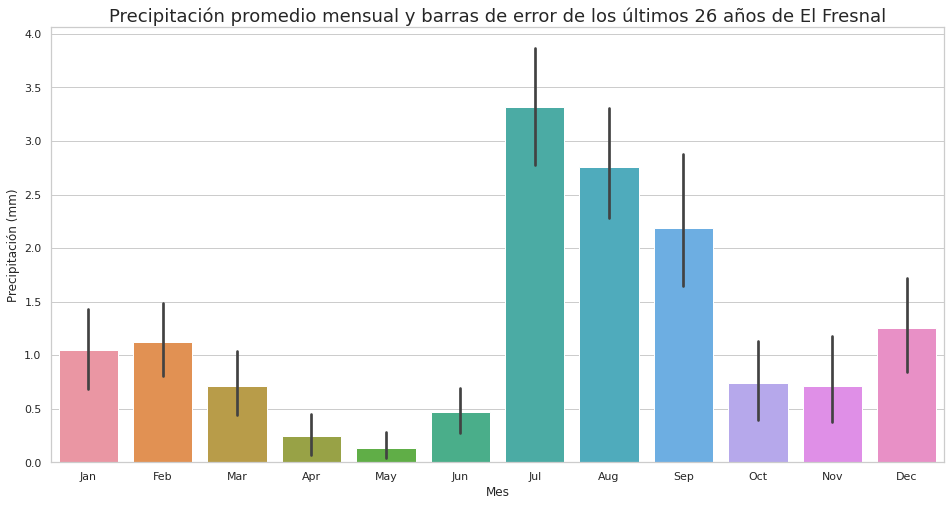

In [30]:
#Graficamos la estacionalidad de los datos por mes 
#Esto con ayuda de la función sns.barplot() 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_26);
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio mensual y barras de error de los últimos 26 años de El Fresnal', fontsize=18)
plt.show()

* Actividad 2 Y 3                                                              
  *Exploramos los datos de Temperaturas Máxima, Mínima y Evaporación de los años 1990 hasta el fin de datos, además tratamos de construir dos subgráficas contiguas.*
> Graficamos todo el rango de datos,  incluyendo una línea punteada mostrando el promedio.                                               
> Analiza un año específico completo para las dos Temperaturas                                                
> Graficamos la estacionalidad filtrando los datos por mes, incluyendo una línea punteada mostrando el promedio

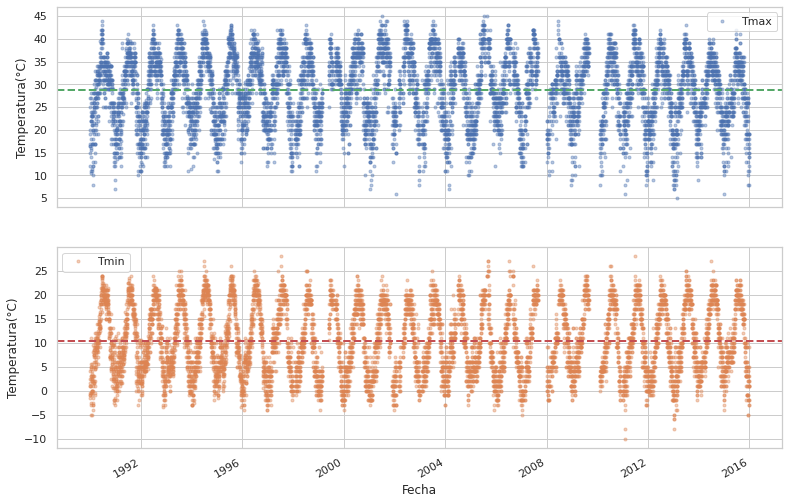

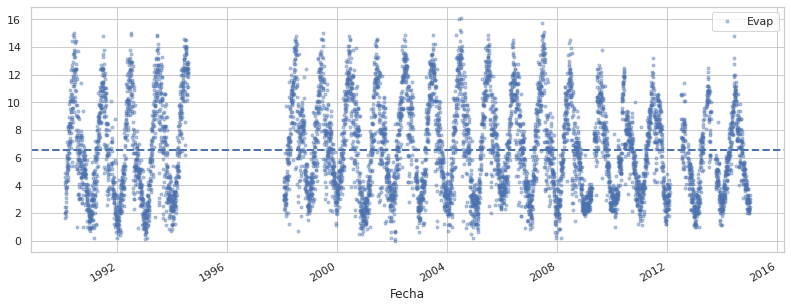

In [31]:
#Los datos que deseamos explorar son Temperaturas Máxima y Mínima de 1990 hasta el fin de los datos.
#Graficamos todo el rango de datos 
#Esto a partir de la función df.plot()
#Se debe incluir una línea punteada mostrando el promedio. 
Tmax_prom_26=df_26['Tmax'].mean()
Tmin_prom_26=df_26['Tmin'].mean()
Evap_prom_26=df_26_2['Evap'].mean()

#Graficamos todo el rango de datos 
#Esto a partir de la función df.plot()
colsplot=['Tmax','Tmin']
ax_ylabels=['Temperatura Máxima (°C)', 'Temperatura Mínima (°C)']
axes=df_26[colsplot].plot(marker='.',alpha=0.4,linestyle='None',figsize=(13,9),subplots=True)

for i, ax in zip(colsplot,axes):
  if i== 'Tmax':
    ax.axhline(Tmax_prom_26, color="g", linestyle="--", linewidth=2)
    ax.set_ylabel("Temperatura(°C)")
  elif i== 'Tmin':
    ax.axhline(Tmin_prom_26, color="r", linestyle="--", linewidth=2)
    ax.set_ylabel("Temperatura(°C)")

#NO TENEMOS DATOS DE EVAPORACIÓN DE EL FRESNAL
#LOS DATOS DE EVAPORACIÓN SON DE UNA ESTACIÓN CERCANA, EN ESTE CASO SAN MIGUEL DE HORCACITAS
colsplot2=['Evap']
df_26_2[colsplot2].plot(marker='.',alpha=0.4,linestyle='None',figsize=(13.5,5),subplots=True)
plt.axhline(Evap_prom_26, color="b", linestyle="--", linewidth=2)
plt.ylabels=['Evaporación (mm)']


Text(0, 0.5, 'Evaporación (mm)')

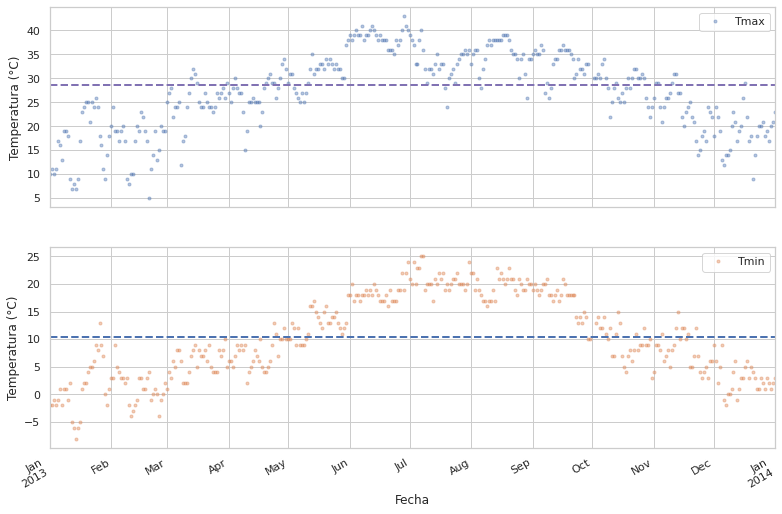

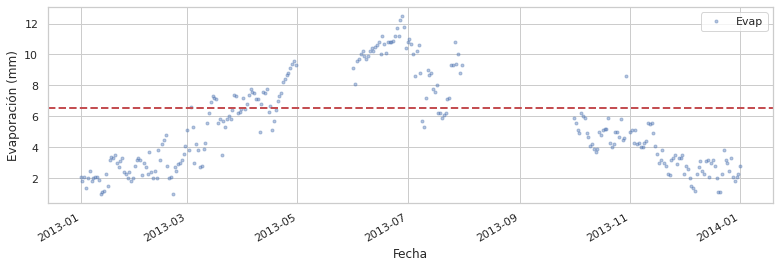

In [32]:
#Analizamos un año en específico para las dos temperaturas, máximas, mínimas y evaporación.
#Esto a partir de la función df.loc() 
colsplot=['Tmax','Tmin']
axes=df_26[colsplot].loc['2013-01-01':'2014-01-01'].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9), subplots=True)
for i, ax in zip(colsplot,axes):
  if i=='Tmax':
    ax.axhline(Tmax_prom_26, color='m', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='Tmin':
    ax.axhline(Tmin_prom_26, color='b', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')

#NO TENEMOS DATOS DE EVAPORACIÓN DE EL FRESNAL
#LOS DATOS DE EVAPORACIÓN SON DE UNA ESTACIÓN CERCANA, EN ESTE CASO SAN MIGUEL DE HORCACITAS
colsplot2=['Evap']
df_26_2[colsplot2].loc['2013-01-01':'2014-01-01'].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,4), subplots=True)
plt.axhline(Evap_prom_26, color='r', linestyle='--', linewidth=2)
plt.ylabel('Evaporación (mm)')

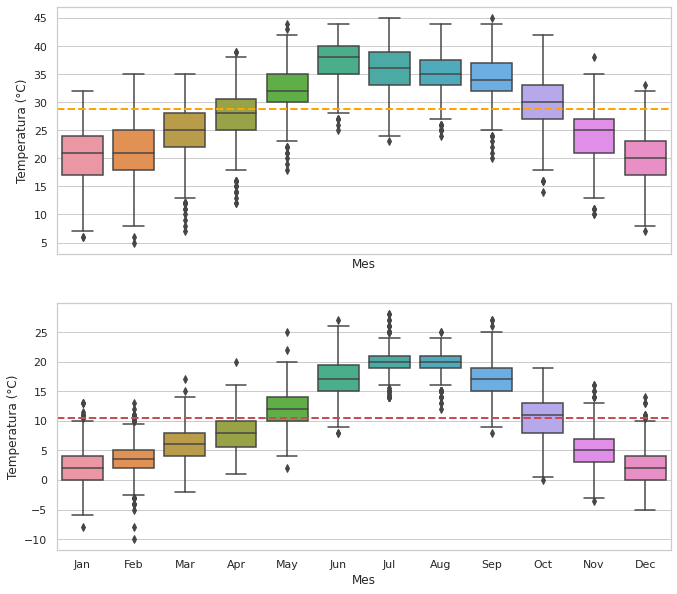

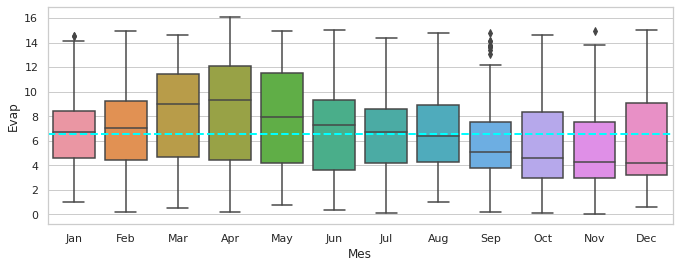

In [33]:
#Graficamos la estacionalidad filtrando los datos por meses
#Esto a partir de la función sns.boxplot()
#Se incluye una línea punteada mostrando el promedio.  
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for i, a in zip(['Tmax', 'Tmin'], axes):
  sns.boxplot(data=df_26, x='Mes', y=i, ax=a)
  if i=='Tmax':
    a.axhline(Tmax_prom_26, color='orange', linestyle='--', linewidth=2)
    a.set_ylabel('Temperatura (°C)')
  elif i=='Tmin':
    a.axhline(Tmin_prom_26, color='r', linestyle='--', linewidth=2)
    a.set_ylabel('Temperatura (°C)')
  ax.set_title(i)
  #Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

#NO TENEMOS DATOS DE EVPORACIÓN DE EL FRESNAL
#LOS DATOS DE EVAPORACIÓN SON DE UNA ESTACIÓN CERCANA, EN ESTE CASO SAN MIGUEL DE HORCACITAS
fig, axes = plt.subplots(1, 1, figsize=(11.2, 4), sharex=True)
sns.boxplot(data=df_26_2, x='Mes', y='Evap')
plt.axhline(Evap_prom_26, color='cyan', linestyle='--', linewidth=2)
plt.ylabels=('Evaporación (mm)')

* Actividad 4                                                                   
  *Creamos nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, además exploramos los datos*
> Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días.                                                             
> Exploramos para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.                                              



In [34]:
#Suavizando la curva de Tmax
#Esto utilizando Promedios Móviles (7,30 y 365 días)
colsplot = ['Tmax', 'Tmin']
df_26_7d = df_26[colsplot].rolling(7, center=True, min_periods=1).mean()
df_26_30d = df_26[colsplot].rolling(30, center=True, min_periods=1).mean()
df_26_365d = df_26[colsplot].rolling(365, center=True, min_periods=1).mean() 

colsplot2 = ['Evap']
df_26_2_7d = df_26_2[colsplot2].rolling(7, center=True, min_periods=1).mean()
df_26_2_30d = df_26_2[colsplot2].rolling(30, center=True, min_periods=1).mean()
df_26_2_365d = df_26_2[colsplot2].rolling(365, center=True, min_periods=1).mean() 


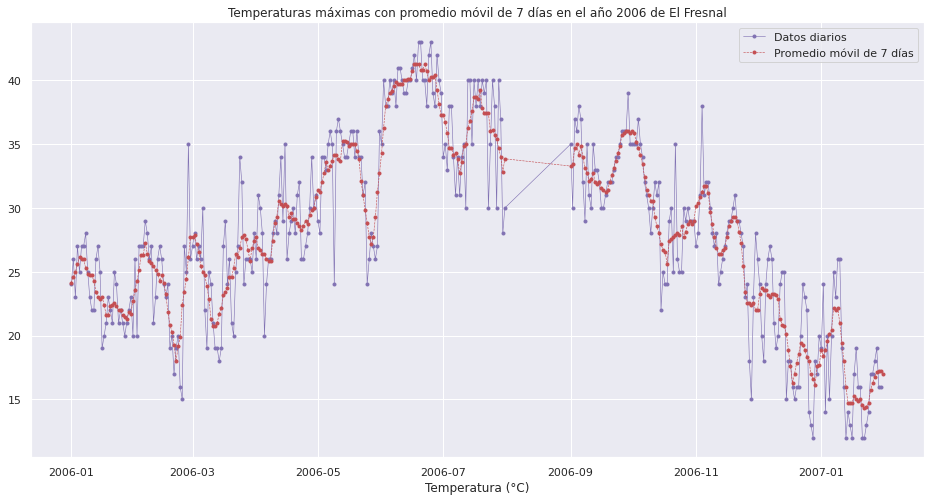

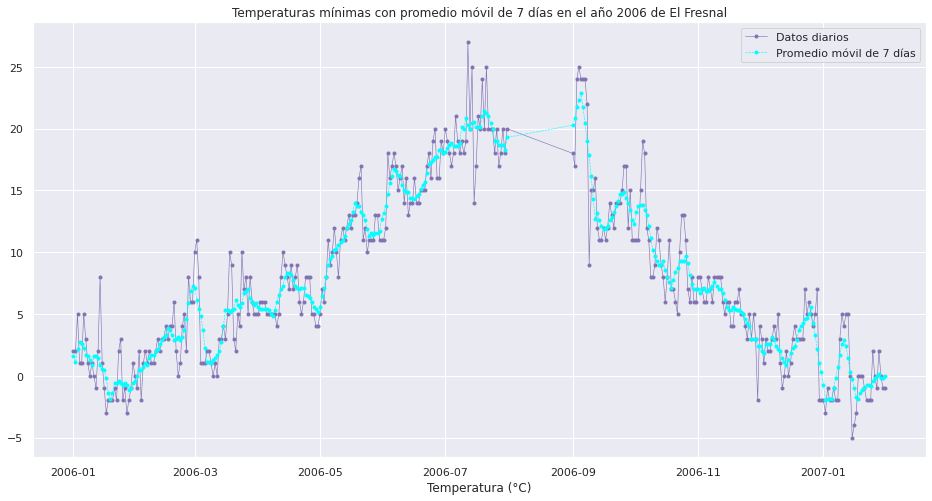

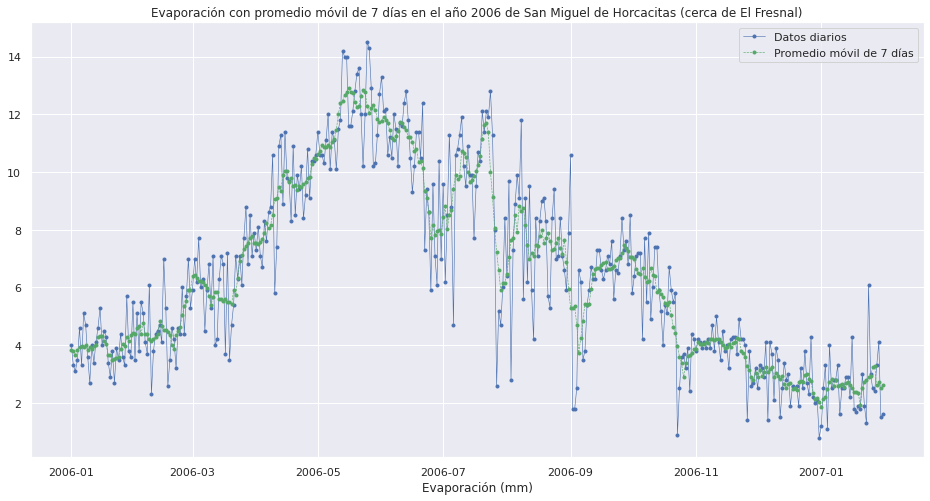

In [35]:
#Esto se lleva a cabo a partir del uso de la función df.rolling().

### EN ESTA SECCIÓN ACLARAMOS QUE SE EXPLORARÁ PARA 1 AÑO DE DATOS, CONTRASTANDO LOS DATOS DIARIOS CON LAS GRÁFICAS DE PROMEDIO MÓVIL DE 7 Y 30 DÍAS.

#Definimos un periodo de tiempo de 1 año para el análisis de temperaturas máximas, temperaturas mínimas y evaporación.
inicio, fin = '2006-01', '2007-01'

#Tamaño de las gráficas 
sns.set(rc={'figure.figsize':(16,8)})

#Construimos la gráfica de constratse con los datos y el promedio móvil de 7 días.
#PARA LA TEMPERATURA MÁXIMA 
fig, ax=plt.subplots()
ax.plot(df_26.loc[inicio:fin, 'Tmax'], marker='.', linestyle='-',color='m', linewidth=0.6, label='Datos diarios')
ax.plot(df_26_7d.loc[inicio:fin, 'Tmax'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 7 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas con promedio móvil de 7 días en el año 2006 de El Fresnal')
ax.legend()

#PARA LA TEMPERATURA MÍNIMA 
fig, ax=plt.subplots()
ax.plot(df_26.loc[inicio:fin, 'Tmin'], marker='.', linestyle='-',color='m', linewidth=0.6, label='Datos diarios')
ax.plot(df_26_7d.loc[inicio:fin, 'Tmin'], marker='.', linestyle='--', linewidth=0.6, color='cyan', label='Promedio móvil de 7 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas con promedio móvil de 7 días en el año 2006 de El Fresnal')
ax.legend()

#PARA LA EVAPORACIÓN
fig, ax=plt.subplots()
ax.plot(df_26_2.loc[inicio:fin, 'Evap'], marker='.', linestyle='-',color='b', linewidth=0.6, label='Datos diarios')
ax.plot(df_26_2_7d.loc[inicio:fin, 'Evap'], marker='.', linestyle='--', linewidth=0.6, color='g', label='Promedio móvil de 7 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Evaporación (mm)')
ax.set_title('Evaporación con promedio móvil de 7 días en el año 2006 de San Miguel de Horcacitas (cerca de El Fresnal)')
ax.legend()

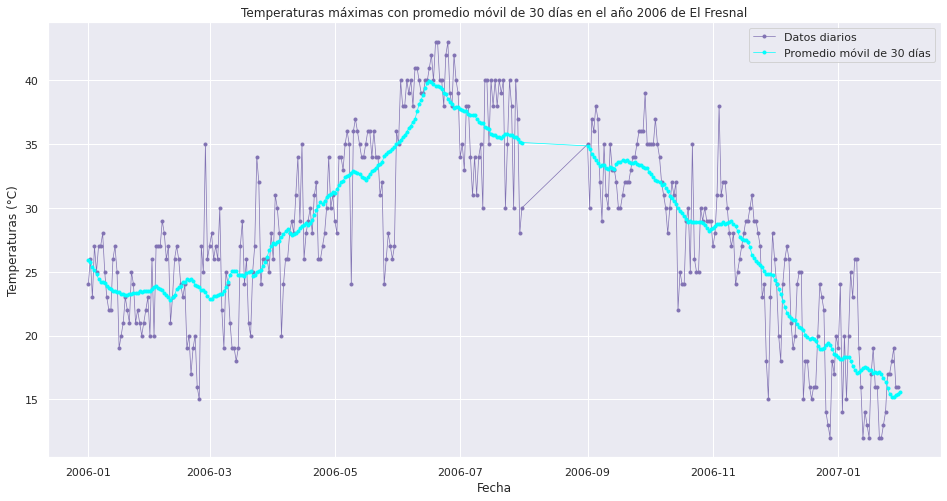

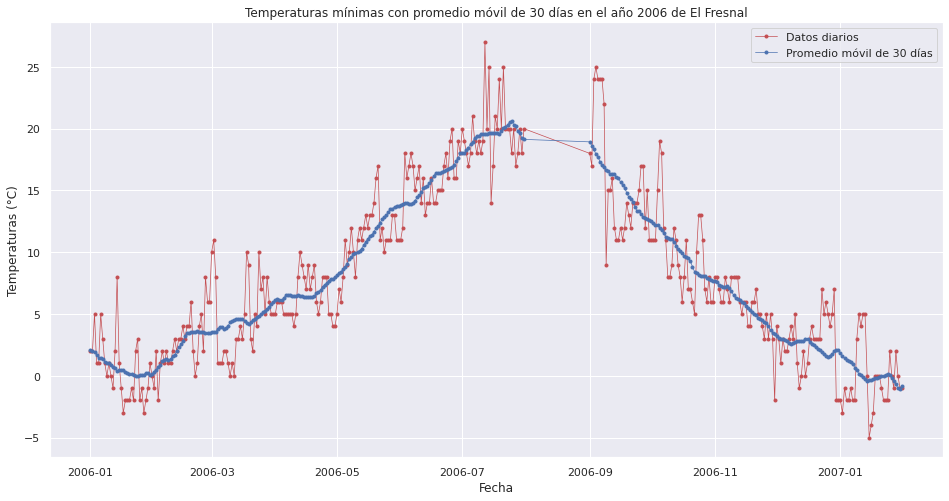

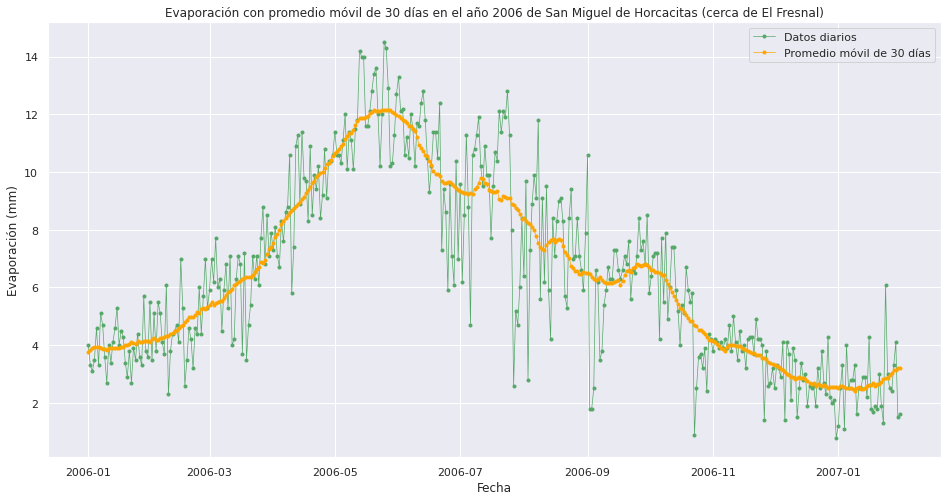

In [36]:
#Tamaño de las gráficas 
sns.set(rc={'figure.figsize':(16,8)})

#Construimos la gráfica de constraste con los datos y promedio móvil de 30 días.
#PARA LA TEMPERATURA MÁXIMA 
fig, ax=plt.subplots()
ax.plot(df_26.loc[inicio:fin, 'Tmax'], marker='.', linestyle='-', color='m', linewidth=0.7, label='Datos diarios')
ax.plot(df_26_30d.loc[inicio:fin, 'Tmax'], marker='.', linestyle='-', color='cyan', linewidth=0.7, label='Promedio móvil de 30 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperaturas (°C)')
ax.set_title('Temperaturas máximas con promedio móvil de 30 días en el año 2006 de El Fresnal')
ax.legend()

#PARA LA TEMPERATURA MÍNIMA 
fig, ax=plt.subplots()
ax.plot(df_26.loc[inicio:fin, 'Tmin'], marker='.', linestyle='-', color='r', linewidth=0.7, label='Datos diarios')
ax.plot(df_26_30d.loc[inicio:fin, 'Tmin'], marker='.', linestyle='-', color='b', linewidth=0.7, label='Promedio móvil de 30 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperaturas (°C)')
ax.set_title('Temperaturas mínimas con promedio móvil de 30 días en el año 2006 de El Fresnal')
ax.legend()

#PARA LA EVAPORACIÓN
fig, ax=plt.subplots()
ax.plot(df_26_2.loc[inicio:fin, 'Evap'], marker='.', linestyle='-', color='g', linewidth=0.7, label='Datos diarios')
ax.plot(df_26_2_30d.loc[inicio:fin, 'Evap'], marker='.', linestyle='-', color='orange', linewidth=0.7, label='Promedio móvil de 30 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación con promedio móvil de 30 días en el año 2006 de San Miguel de Horcacitas (cerca de El Fresnal)')
ax.legend()

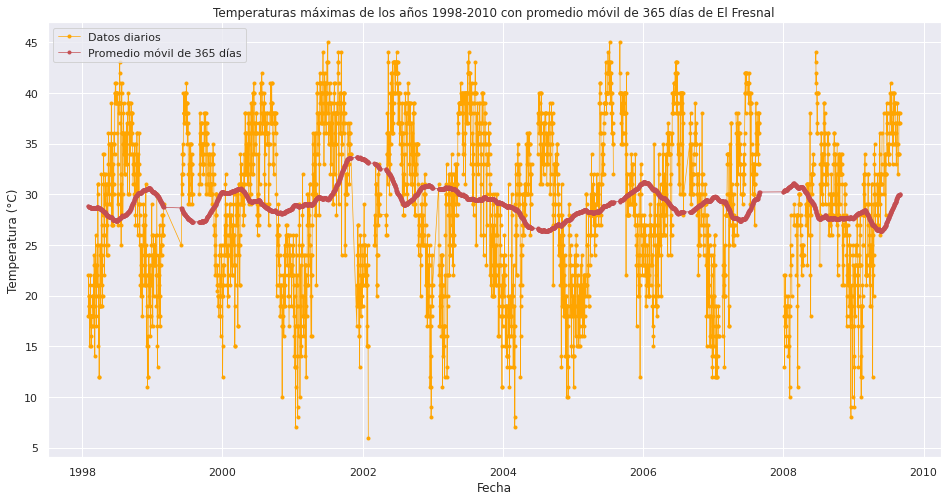

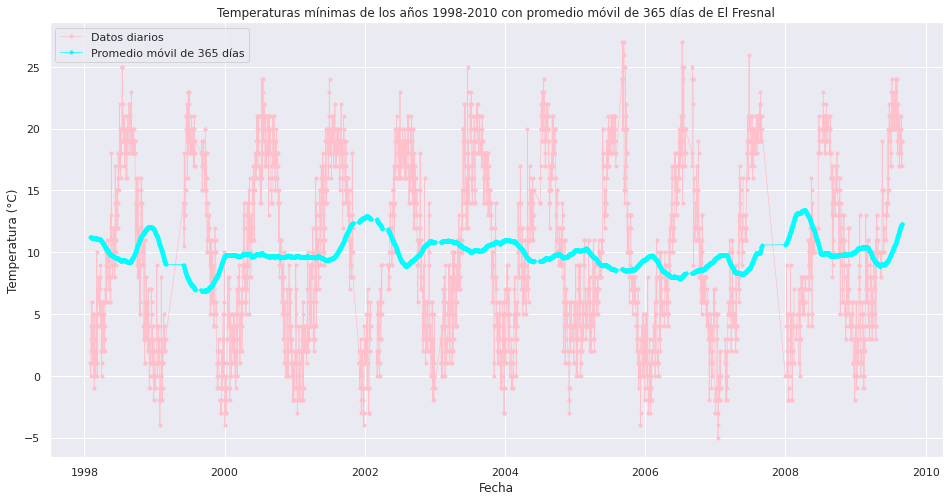

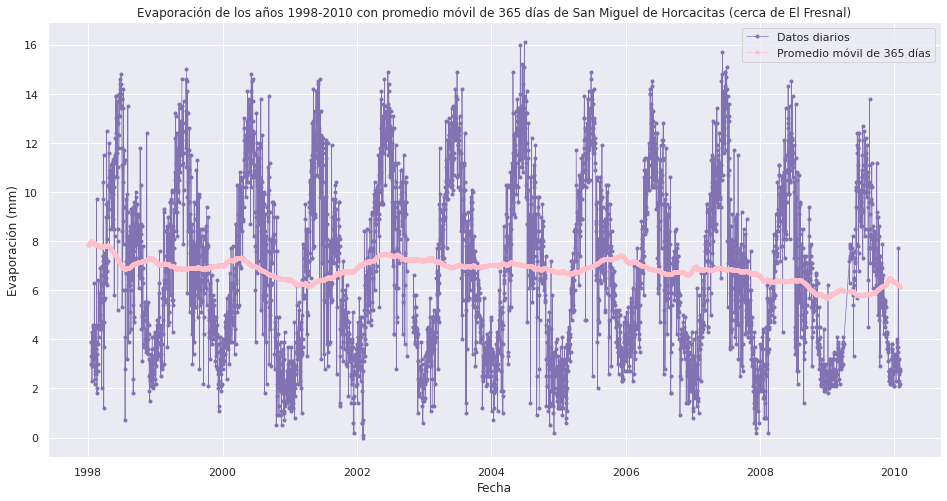

In [37]:
##EN ESTA SECCIÓN ACLARAMOS QUE SE EXPLORARÁN PARA 12 AÑOS DE DATOS, CONTRASTANDO LOS DATOS DIARIOS CON LAS GRÁFICAS DE PROMEDIO MÓVIL DE 365 DÍAS.
#Definimos un periodo de tiempo de 12 años para el análisis
inicio, fin = '1998-01', '2010-01'

#Construimos la gráfica de constratse con los datos y el promedio móvil de 365 días.
#PARA LA TEMPERATURA MÁXIMA 
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots()
ax.plot(df_26.loc[inicio:fin, 'Tmax'],marker='.', linestyle='-', linewidth=0.7, color='orange', label='Datos diarios')
ax.plot(df_26_365d.loc[inicio:fin, 'Tmax'], marker='.', linestyle='-', color='r', linewidth=0.7, label='Promedio móvil de 365 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas de los años 1998-2010 con promedio móvil de 365 días de El Fresnal')
ax.legend()

#PARA LA TEMPERATURA MÍNIMA
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots()
ax.plot(df_26.loc[inicio:fin, 'Tmin'],marker='.', linestyle='-', linewidth=0.7, color='pink', label='Datos diarios')
ax.plot(df_26_365d.loc[inicio:fin, 'Tmin'], marker='.', linestyle='-', color='cyan', linewidth=0.7, label='Promedio móvil de 365 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas de los años 1998-2010 con promedio móvil de 365 días de El Fresnal')
ax.legend()

#PARA LA EVAPORACIÓN
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots()
ax.plot(df_26_2.loc[inicio:fin, 'Evap'],marker='.', linestyle='-', linewidth=0.7, color='m', label='Datos diarios')
ax.plot(df_26_2_365d.loc[inicio:fin, 'Evap'], marker='.', linestyle='-', color='pink', linewidth=0.7, label='Promedio móvil de 365 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación de los años 1998-2010 con promedio móvil de 365 días de San Miguel de Horcacitas (cerca de El Fresnal)')
ax.legend()

* Actividad 5                                                                   
  *Realizamos una descomposición de una serie de tiempo: Serie Observada= Tendencia + Estacionalidad + Residuo.*
> Lo aplicamos a los datos de Temperaturas Tmax y Tmin.                                                       

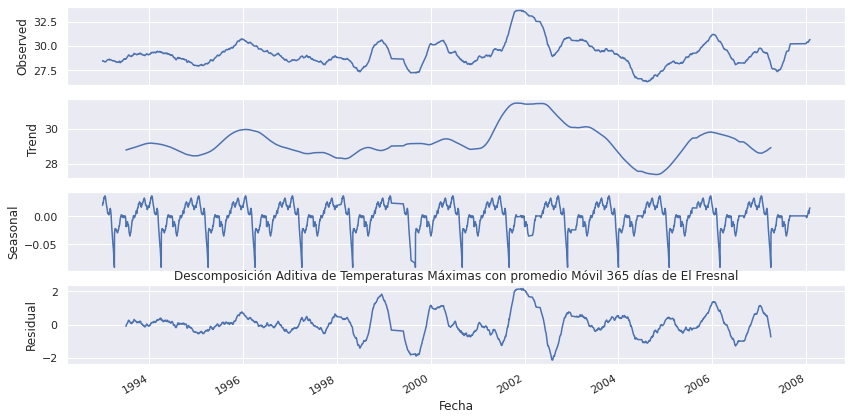

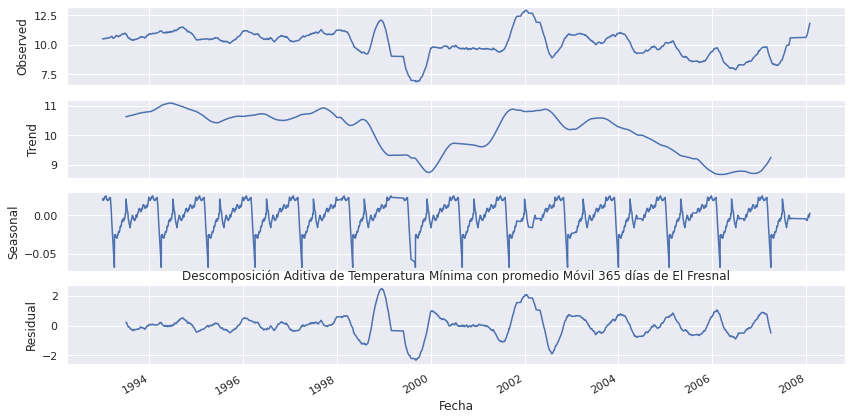

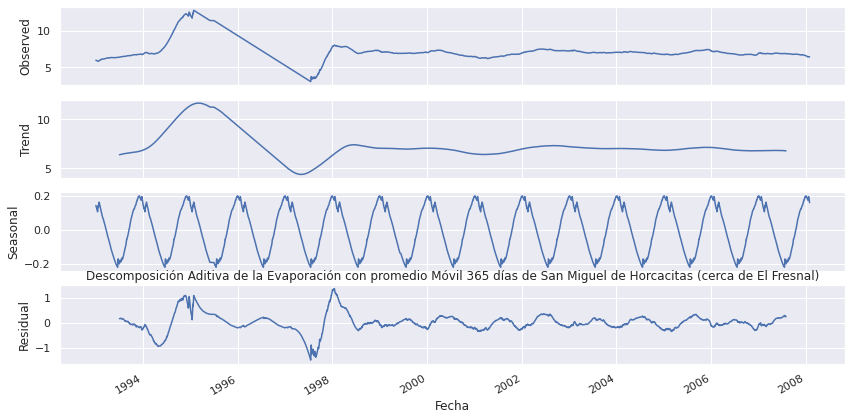

In [38]:
#Hacemos uso de la biblioteca statsmodels.tsa de Python.                                                             
#Utilizamos la función seasonal_decompose para lograrlo, dicha función aplica su propio promedio móvil a las series de datos para su análisis.
#Para la descomposición de una serie de tiempo 

#Definimos un periodo de tiempo de 15 años para el análisis (No funciona cuando hace falta un rango de datos)
inicio, fin = '1993-01', '2008-01'
#tamaño de gráfico
sns.set(rc={'figure.figsize':(12, 6)})
#Declaramos nuestro ciclo anual 365 días (Por las Estaciones)
desfreq = 365

##PARA TEMPERATURA MÁXIMA
resTmax = sm.tsa.seasonal_decompose(df_26_365d.loc[inicio:fin, 'Tmax'].interpolate(),freq=desfreq, model='additive')
resTmax.plot()
plt.title('Descomposición Aditiva de Temperaturas Máximas con promedio Móvil 365 días de El Fresnal');


##PARA TEMPERATURA MÍNIMA
resTmin = sm.tsa.seasonal_decompose(df_26_365d.loc[inicio:fin, 'Tmin'].interpolate(), freq=desfreq, model='additive')
resTmin.plot()
plt.title('Descomposición Aditiva de Temperatura Mínima con promedio Móvil 365 días de El Fresnal');

##PARA TEMPERATURA MÍNIMA
resEvap = sm.tsa.seasonal_decompose(df_26_2_365d.loc[inicio:fin, 'Evap'].interpolate(), freq=desfreq, model='additive')
resEvap.plot()
plt.title('Descomposición Aditiva de la Evaporación con promedio Móvil 365 días de San Miguel de Horcacitas (cerca de El Fresnal)');


* Actividad 6                                                                   
  *Exploramos visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos*
> Utilizamos la función de Seaborn sns.distplot.                                                           
> Agregamos una línea vertical punteada indicando el valor del promedio de cada grupo de datos.


El promedio de la temperatura máxima en El Fresnal durante 1981 - 1990 es: 27.703424657534246 °C
El promedio de la temperatura máxima en El Fresnal durante 1990 - 2016 es: 28.702627618937377 °C
El promedio de la temperatura mínima en El Fresnal durante 1981 - 1990 es: 10.489822595704949 °C
El promedio de la temperatura máxima en El Fresnal durante 1990 - 2016 es: 10.399363794100637 °C


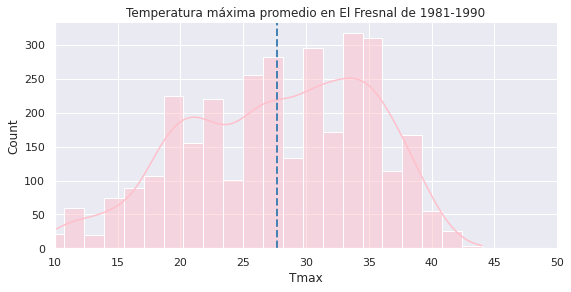

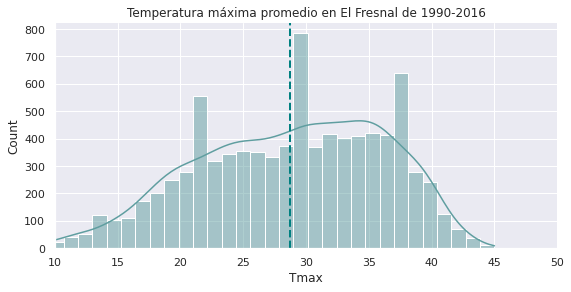

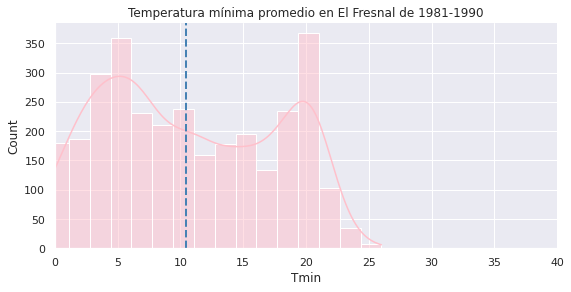

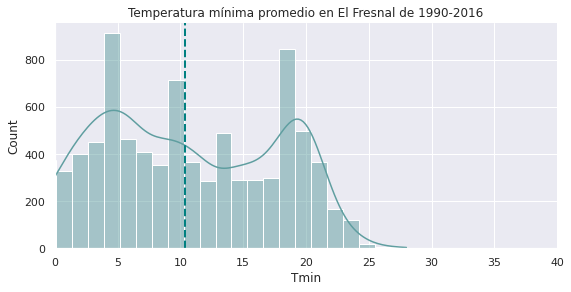

In [21]:
#Seleccionaremos el primer conjuntos de años
df_90_1 = df_meteo_ts[(df_meteo_ts['Año'] >= 1981) & (df_meteo_ts['Año'] < 1990)]

#Seleccionaremos el segundo conjunto de años
df_90_2 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2016)]

#Gráfica de distribuciones 

##TEMPERATURAS MÁXIMAS
g1 = sns.displot(df_90_1.Tmax, kde=True, color='pink', height=4, aspect=2);
plt.axvline(df_90_1.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue');
g1.set(title='Temperatura máxima promedio en El Fresnal de 1981-1990');
g1.set(xlim=(10,50))

g2 = sns.displot(df_90_2.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_90_2.Tmax.mean(), linestyle='--', linewidth=2, color='teal');
g2.set(title='Temperatura máxima promedio en El Fresnal de 1990-2016');
g2.set(xlim=(10,50))

print('El promedio de la temperatura máxima en El Fresnal durante 1981 - 1990 es:', df_90_1.Tmax.mean(), '°C')
print('El promedio de la temperatura máxima en El Fresnal durante 1990 - 2016 es:', df_90_2.Tmax.mean(), '°C')

##TEMPERATURAS MÍNIMAS
g1_2 = sns.displot(df_90_1.Tmin, kde=True, color='pink', height=4, aspect=2);
plt.axvline(df_90_1.Tmin.mean(), linestyle='--', linewidth=2, color='steelblue');
g1_2.set(title='Temperatura mínima promedio en El Fresnal de 1981-1990');
g1_2.set(xlim=(0,40))

g2_2 = sns.displot(df_90_2.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_90_2.Tmin.mean(), linestyle='--', linewidth=2, color='teal');
g2_2.set(title='Temperatura mínima promedio en El Fresnal de 1990-2016');
g2_2.set(xlim=(0,40))

print('El promedio de la temperatura mínima en El Fresnal durante 1981 - 1990 es:', df_90_1.Tmin.mean(), '°C' )
print('El promedio de la temperatura máxima en El Fresnal durante 1990 - 2016 es:', df_90_2.Tmin.mean(), '°C' )

plt.show();
